<a href="https://colab.research.google.com/github/Mahdi-Abdollahii/NGC_6822/blob/main/SFH_AMR_Fitting/NGC6822_SFH_AMR_Fitting_NoStype.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir Bar
!mkdir Bar_Whitelock
!mkdir Outer_Region

In [2]:
!git clone https://github.com/Mahdi-Abdollahii/NGC_6822.git

Cloning into 'NGC_6822'...
remote: Enumerating objects: 1968, done.
remote: Counting objects: 100% (880/880), done.
remote: Compressing objects: 100% (467/467), done.
remote: Total 1968 (delta 487), reused 708 (delta 412), pack-reused 1088
Receiving objects: 100% (1968/1968), 135.56 MiB | 9.87 MiB/s, done.
Resolving deltas: 100% (1010/1010), done.
Updating files: 100% (227/227), done.


In [3]:
%matplotlib inline
from matplotlib import cm
import matplotlib.pyplot as plt
import pylab as py
from matplotlib import gridspec
import numpy as np
import pandas as pd
import math
import scipy.integrate as integrate
pd.options.mode.chained_assignment = None  # default='warn'

from astropy.io import ascii
import csv
import matplotlib.colors as mcolors
from matplotlib.font_manager import FontProperties
import matplotlib.markers as mmark
import matplotlib.lines as mlines
from matplotlib.legend_handler import HandlerBase
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import AutoMinorLocator

import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import host_subplot
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolor

import warnings
warnings.filterwarnings("ignore")

In [4]:
def Ellipse(x,a,b):
  '''
   a: semi-major axis
   b: semi-minor axis
  '''
  y = b * ((1 - ((x/a)**2) )**0.5)
  return y

In [5]:
DM = 23.45 # based on sibbons => (Mateo 1998; Lee et al. 1993)

Av = 0.77  # based on whitelock 2012
Aj = 0.2   # based on whitelock 2012
Ah = 0.12  # based on whitelock 2012
Ak = 0.07  # based on whitelock 2012

RGBT = 17.42 # based on whitelock 2012

Ra_center = 296.23 #degree
Dec_center = -14.80167 #degree

Distance = 500 #Kpc

# Data Preparing

In [15]:
df_loc = pd.read_csv('/content/NGC_6822/Data_V3/Data_location.csv')

In [16]:
df_loc

,Unnamed: 0,Ra(J2000) deg,Dec(J2000) deg,Whitelock,Wyder,Bulge,Body,Bulge_Center,Bulge_North,Bulge_South
0,0,296.183980,-14.780180,1,0,1,0,1,0,0
1,1,296.252290,-14.784750,1,1,1,0,1,0,0
2,2,296.204150,-14.634860,1,0,0,0,0,0,0
3,3,296.223640,-14.774730,1,1,1,0,1,0,0
4,4,296.218160,-14.880350,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
324,324,296.044067,-14.905341,0,0,0,0,0,0,0
325,325,296.003693,-14.974893,0,0,0,0,0,0,0
326,326,295.993561,-14.990264,0,0,0,0,0,0,0
327,327,296.020050,-15.036669,0,0,0,0,0,0,0


In [17]:
df_Whitelock = pd.read_csv('/content/NGC_6822/Data/Whitelock.csv')
df_Whitelock

,Seq( ),RAJ2000(deg),DEJ2000(deg),M( ),Jmag(mag),e_Jmag(mag),o_Jmag( ),Hmag(mag),e_Hmag(mag),o_Hmag( ),Ksmag(mag),e_Ksmag(mag),o_Ksmag( ),J-H(mag),H-Ks(mag),J-Ks(mag),recno()
0,30370.0,296.17061,-14.95234,,17.588,0.087,7.0,17.170,0.044,10.0,17.138,0.078,9.0,0.418,0.032,0.450,1.0
1,31395.0,296.17062,-14.96028,,18.749,0.136,14.0,17.952,0.057,14.0,17.686,0.069,12.0,0.797,0.266,1.063,2.0
2,30746.0,296.17076,-14.97089,,17.537,0.033,13.0,17.091,0.040,14.0,17.061,0.078,14.0,0.446,0.030,0.476,3.0
3,31721.0,296.17082,-14.88634,,18.644,0.072,11.0,17.683,0.047,12.0,17.429,0.085,12.0,0.961,0.254,1.215,4.0
4,30982.0,296.17091,-14.89924,,17.498,0.021,11.0,17.000,0.049,15.0,16.867,0.057,13.0,0.498,0.133,0.631,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6252,21898.0,296.30447,-14.65989,,18.322,0.082,5.0,17.810,0.089,4.0,17.493,0.198,4.0,0.512,0.317,0.829,6253.0
6253,40643.0,296.30451,-14.75199,,16.742,0.011,6.0,16.021,0.083,8.0,15.823,0.099,6.0,0.721,0.198,0.919,6254.0
6254,10482.0,296.30455,-14.77980,,16.202,0.017,3.0,15.658,0.413,5.0,15.564,0.019,3.0,0.544,0.094,0.638,6255.0
6255,12680.0,296.30462,-14.76793,,17.940,0.010,3.0,16.843,0.371,5.0,16.656,0.012,2.0,1.097,0.187,1.284,6256.0


# Bar

In [6]:
# Import libraries
import glob
import pandas as pd
import os

# Get CSV files list from a folder
path = '/content/NGC_6822/Data_Correction_AMR_fitting'
all_files = glob.glob(os.path.join(path, "*.csv"))

In [22]:
df

,Ra(J2000) deg,Dec(J2000) deg,J,H,Ks,Types,Ref,R,J-Ks,Log(M/Ms),...,dt,Unnamed: 0,Whitelock,Wyder,Bulge,Body,Bulge_Center,Bulge_North,Bulge_South,alpha
0,296.204498,-14.674287,18.120,17.550,17.210,C,Sibbons,89.990,0.910,-0.071557,...,44377.099090,150,1,0,0,1,0,0,0,2.3
1,296.193878,-14.664783,18.140,17.605,17.187,C8.2 e,Kacharov,20.917,0.953,-0.065618,...,47501.765440,253,1,0,0,1,0,0,0,2.3
2,296.220330,-14.728410,18.060,17.250,17.080,Ce,Sibbons,89.990,0.980,-0.039645,...,241247.633819,99,1,0,1,0,0,1,0,2.3
3,296.183980,-14.780180,18.030,17.510,17.050,O,Whitelock,89.990,0.980,-0.034388,...,247090.126835,0,1,0,1,0,1,0,0,2.3
4,296.263153,-14.898390,17.973,17.307,17.005,C5.5,Kacharov,20.287,0.968,-0.026501,...,207870.569597,305,1,0,0,1,0,0,1,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,296.267020,-14.763110,15.260,14.670,14.110,O,Whitelock,89.990,1.150,0.626405,...,114732.076513,8,1,1,1,0,1,0,0,2.3
217,296.240050,-14.807960,14.540,13.940,13.590,RSG,Whitelock,89.990,0.950,0.807165,...,9595.527224,95,1,1,1,0,1,0,0,2.3
218,296.226960,-14.801910,14.280,13.660,13.270,RSG,Whitelock,89.990,1.010,0.957935,...,22245.340546,94,1,1,1,0,1,0,0,2.3
219,296.243010,-14.746520,13.900,13.300,12.920,RSG,Whitelock,89.990,0.980,1.095544,...,215728.252837,96,1,1,1,0,0,1,0,2.3


MASS:  17365447.648005955
MASS:  20220643.491620816
MASS:  23164273.161391303


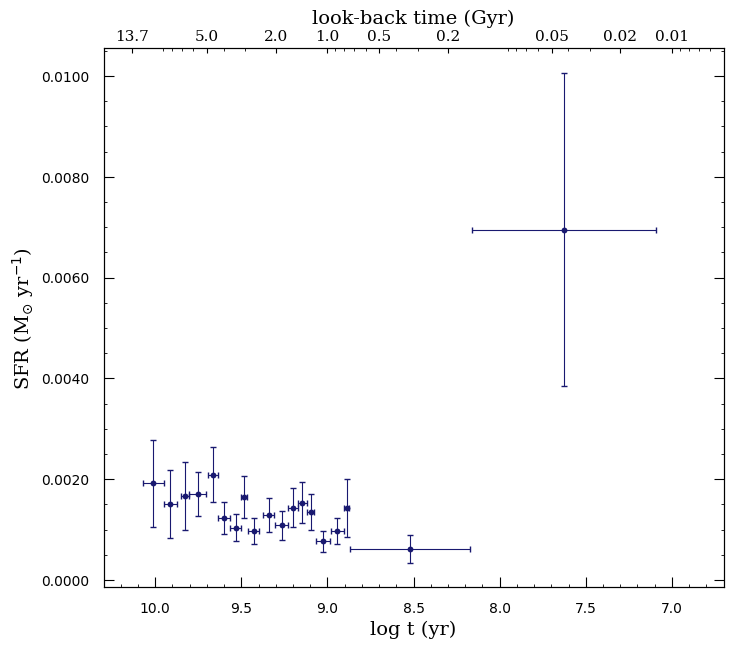

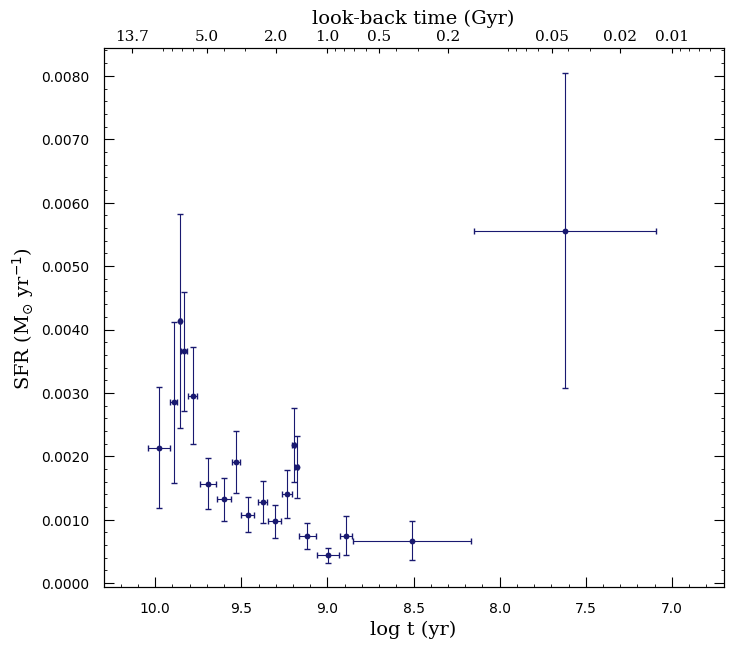

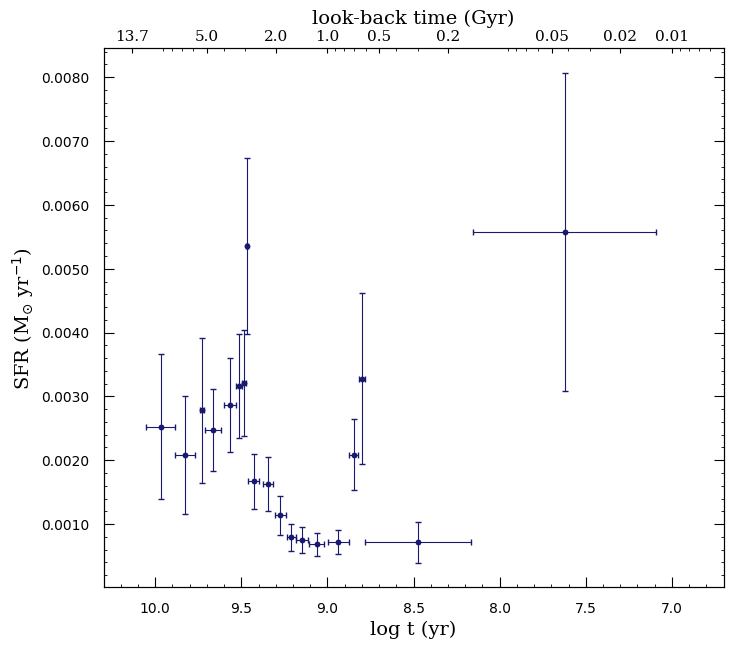

In [23]:
for l in range(len(all_files)):

  #Sorting By t (Age of LPV Stras)
  df =  pd.read_csv(all_files[l])
  df = df[df['Types']!='S']
  df = df.merge(df_loc, how='inner', on = ['Ra(J2000) deg','Dec(J2000) deg'])
  df = df[df['Whitelock'] == 1 ]

  #Sorting By t (Age of LPV Stras)
  df = df.sort_values(by='t', ascending=False)
  df = df.reset_index(drop=True)

  #Finding Alpha
  df['alpha'] = np.nan
  for k in df.index:
    if df.loc[k,'M/Ms'] < 0.08 :
      df.loc[k,'alpha'] = 0.3
    elif df.loc[k,'M/Ms'] >= 0.5 :
      df.loc[k,'alpha'] = 2.3
    else :
      df.loc[k,'alpha'] = 1.3

  # Whole Region
  # Setting populatopn of each bins
  bins_number = 13
  bins_with_less_stars = 6
  bins_pop = [5,5,6]+([15]*(bins_number-bins_with_less_stars)) + ([14]*bins_with_less_stars) + [6,5,5]

  #SFH Calcualtion
  lower_index = 0
  sub_integration = 0

  sub_integration = integrate.quad(lambda m: m * m**-0.3 , 0.02, 0.08)[0] \
                    + integrate.quad(lambda m: m * m**-1.3 , 0.08, 0.5)[0] \
                      + integrate.quad(lambda m: m * m**-2.3 , 0.5, 200)[0]

  log_t = []
  log_t_err = []

  XI = []
  XI_err = []

  alpha =[]
  M_lower_limit = []
  M_upper_limit = []
  log_t_lower_limit = []
  log_t_upper_limit = []

  for i in bins_pop :

    selected_df = df[lower_index:lower_index+i]

    # Calculating limitation of each bin
    M_lower_limit_ = selected_df.iloc[0]['M/Ms']
    M_upper_limit_ = selected_df.iloc[-1]['M/Ms']
    alpha_ = selected_df.iloc[0]['alpha']
    log_t_lower_limit_ = selected_df.iloc[-1]['Log(t)']
    log_t_upper_limit_ = selected_df.iloc[0]['Log(t)']

    # Adding to lists
    alpha.append(alpha_)
    M_lower_limit.append(M_lower_limit_)
    M_upper_limit.append(M_upper_limit_)
    log_t_lower_limit.append(log_t_lower_limit_)
    log_t_upper_limit.append(log_t_upper_limit_)

    # Calculating XI
    p1 = sum(1/selected_df['dt'])
    p2 = sub_integration
    p3 , err = integrate.quad(lambda m: m**(-alpha_) , M_lower_limit_, M_upper_limit_)

    XI_ = p1 * p2 * (1/p3)
    XI_err_ = XI_ * ((i**0.5)/i)

    log_t.append((log_t_lower_limit_ + log_t_upper_limit_)/2)
    log_t_err.append((log_t_upper_limit_ - log_t_lower_limit_ )/2)
    XI.append(XI_)
    XI_err.append(XI_err_)

    lower_index += i

  # Making Data frame for SFH calculation
  columns = ['log(t) (lower limit)' , 'log(t) (upper limit)',
            'M (lower limit)', 'M (upper limit)' , 'Alpha' , 'Mean log(t)',
            'Mean log(t) error' , 'XI' , 'XI error']

  # Calling DataFrame constructor after zipping
  # both lists, with columns specified
  SFH_df = pd.DataFrame(list(zip(log_t_lower_limit, log_t_upper_limit,
                                M_lower_limit,M_upper_limit,alpha,log_t,
                                log_t_err,XI,XI_err)), columns =columns)

  print("MASS:  " + str(sum((pow(10,(SFH_df['log(t) (upper limit)'])) - pow(10,SFH_df['log(t) (lower limit)'])) * SFH_df['XI'])))

  #Plot
  plt.figure(figsize = (8,7), dpi = 100)

  plt.xlabel('log t (yr)', {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})
  plt.ylabel('SFR (M$_{\odot}$ yr$^{-1}$)',
            {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})

  plt.tick_params(axis='both', which='major', length=7, pad=10, direction='in')
  plt.tick_params(axis='y', which='both', left=True, direction='in')
  plt.tick_params(axis='x', which='both', bottom=True, direction='in')
  plt.tick_params(axis='x', which='both', top=True, direction='in')
  plt.tick_params(axis='y', which='both', right=True, direction='in')

  plt.minorticks_on()

  xlim_lower_left, xlim_lower_right = 10.3,6.7
  plt.xlim(xlim_lower_left,xlim_lower_right)

  plt.plot( SFH_df['Mean log(t)'] , SFH_df['XI'] , '.', color = 'midnightblue')
  plt.errorbar(SFH_df['Mean log(t)'], SFH_df['XI'] ,
              SFH_df['XI error'] ,SFH_df['Mean log(t) error'], fmt='.', color='midnightblue', capsize=2.5, linewidth=0.8)

  #plt.legend()

  ###########################################
  ax2 = plt.twiny()

  ax2.xaxis.tick_top()
  ax2.yaxis.tick_right()
  ax2.set_xlim((10**xlim_lower_left)/10**9,(10**xlim_lower_right)/10**9)

  ax2.set_xscale('log')

  ax2.set_xlabel('look-back time (Gyr)', {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})
  ax2.xaxis.set_label_position('top')
  ax2.yaxis.set_label_position('right')
  ax2.set_xticks((13.7,5,2,1,0.5,0.2,0.05,0.02,0.01))
  ax2.get_xaxis().set_major_formatter(ticker.ScalarFormatter(useOffset=None, useMathText=None, useLocale=None))
  ax2.set_yticklabels(ax2.get_yticks(), fontsize=12,fontname = "serif")
  ax2.set_xticklabels(ax2.get_xticks(), fontsize=11,fontname = "serif")

  ax2.tick_params(axis='x',which='both',bottom= False,top= True,direction='in')#,color='red',width=5)
  ax2.yaxis.set_major_formatter(FormatStrFormatter('%0.4f'))
  #ax2.xaxis.set_major_formatter(FormatStrFormatter('%0.2f'))

  #Saving Data
  SFH_df.to_csv('/content/Bar/NGC6822_SFH_Data_Bar_AMR_Fitting_CEL_'+str(3-l)+'.csv', index=False)
  plt.savefig('/content/Bar/SFR_Bar_AMR_Fitting_CEL_'+str(3-l)+'.jpeg', bbox_inches='tight', dpi = 400)

In [24]:
len(df),sum(bins_pop)

(221, 221)

#Bar_Whitelock

In [40]:
# Import libraries
import glob
import pandas as pd
import os

# Get CSV files list from a folder
path = '/content/NGC_6822/Data_Correction_AMR_fitting'
all_files = glob.glob(os.path.join(path, "*.csv"))

MASS:  3796265.5682204803
MASS:  4084242.967769226
MASS:  4693954.545556073


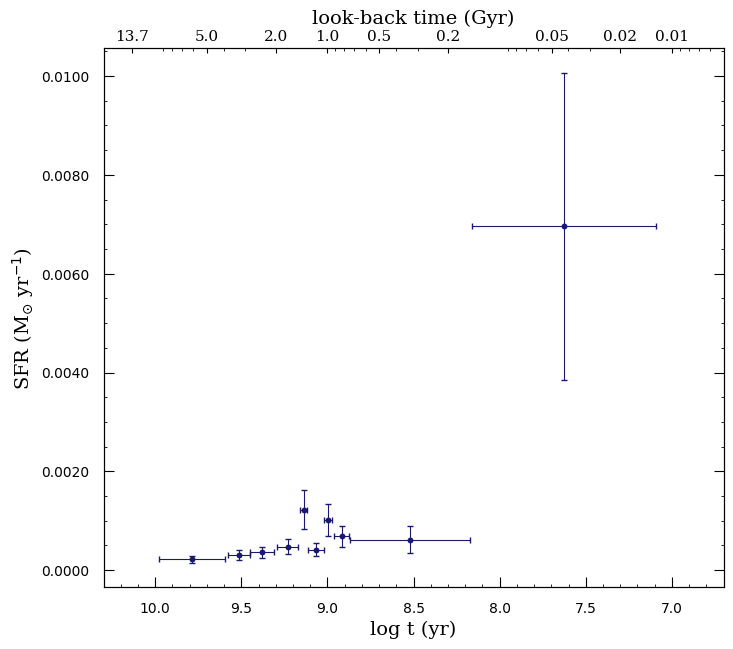

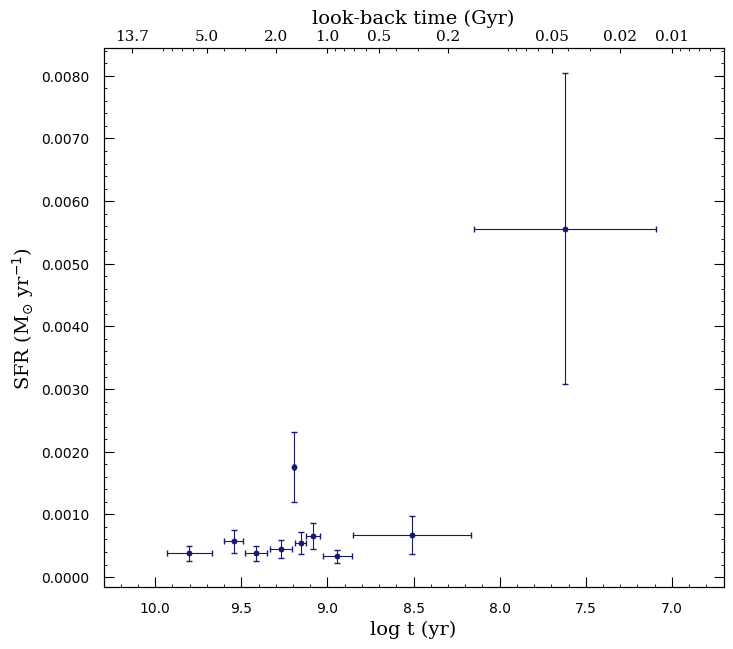

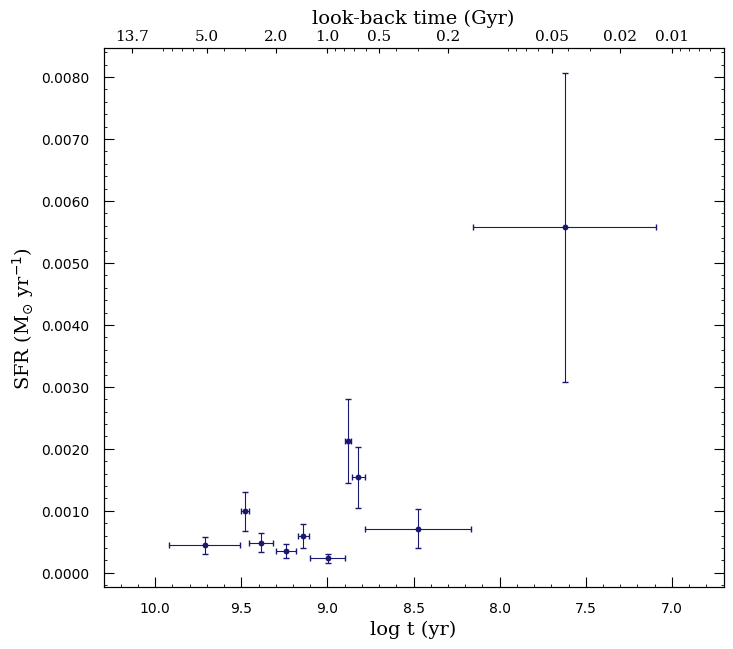

In [41]:
for l in range(len(all_files)):

  #Sorting By t (Age of LPV Stras)
  df =  pd.read_csv(all_files[l])
  df = df[df['Types']!='S']
  df = df.merge(df_loc, how='inner', on = ['Ra(J2000) deg','Dec(J2000) deg'])
  df = df[df['Ref'] == 'Whitelock']

  #Sorting By t (Age of LPV Stras)
  df = df.sort_values(by='t', ascending=False)
  df = df.reset_index()

  #Finding Alpha
  df['alpha'] = np.nan
  for k in df.index:
    if df.loc[k,'M/Ms'] < 0.08 :
      df.loc[k,'alpha'] = 0.3
    elif df.loc[k,'M/Ms'] >= 0.5 :
      df.loc[k,'alpha'] = 2.3
    else :
      df.loc[k,'alpha'] = 1.3

  # Whole Region
  # Setting populatopn of each bins
  bins_number = 8
  bins_with_more_stars = 0
  bins_pop = ([10]*(bins_number-bins_with_more_stars)) + ([9]*bins_with_more_stars) + [5,5]

  #SFH Calcualtion
  lower_index = 0
  sub_integration = 0

  sub_integration = integrate.quad(lambda m: m * m**-0.3 , 0.02, 0.08)[0] \
                    + integrate.quad(lambda m: m * m**-1.3 , 0.08, 0.5)[0] \
                      + integrate.quad(lambda m: m * m**-2.3 , 0.5, 200)[0]

  log_t = []
  log_t_err = []

  XI = []
  XI_err = []

  alpha =[]
  M_lower_limit = []
  M_upper_limit = []
  log_t_lower_limit = []
  log_t_upper_limit = []

  for i in bins_pop :

    selected_df = df[lower_index:lower_index+i]

    # Calculating limitation of each bin
    M_lower_limit_ = selected_df.iloc[0]['M/Ms']
    M_upper_limit_ = selected_df.iloc[-1]['M/Ms']
    alpha_ = selected_df.iloc[0]['alpha']
    log_t_lower_limit_ = selected_df.iloc[-1]['Log(t)']
    log_t_upper_limit_ = selected_df.iloc[0]['Log(t)']

    # Adding to lists
    alpha.append(alpha_)
    M_lower_limit.append(M_lower_limit_)
    M_upper_limit.append(M_upper_limit_)
    log_t_lower_limit.append(log_t_lower_limit_)
    log_t_upper_limit.append(log_t_upper_limit_)

    # Calculating XI
    p1 = sum(1/selected_df['dt'])
    p2 = sub_integration
    p3 , err = integrate.quad(lambda m: m**(-alpha_) , M_lower_limit_, M_upper_limit_)

    XI_ = p1 * p2 * (1/p3)
    XI_err_ = XI_ * ((i**0.5)/i)

    log_t.append((log_t_lower_limit_ + log_t_upper_limit_)/2)
    log_t_err.append((log_t_upper_limit_ - log_t_lower_limit_ )/2)
    XI.append(XI_)
    XI_err.append(XI_err_)

    lower_index += i

  # Making Data frame for SFH calculation
  columns = ['log(t) (lower limit)' , 'log(t) (upper limit)',
            'M (lower limit)', 'M (upper limit)' , 'Alpha' , 'Mean log(t)',
            'Mean log(t) error' , 'XI' , 'XI error']

  # Calling DataFrame constructor after zipping
  # both lists, with columns specified
  SFH_df = pd.DataFrame(list(zip(log_t_lower_limit, log_t_upper_limit,
                                M_lower_limit,M_upper_limit,alpha,log_t,
                                log_t_err,XI,XI_err)), columns =columns)

  print("MASS:  " + str(sum((pow(10,(SFH_df['log(t) (upper limit)'])) - pow(10,SFH_df['log(t) (lower limit)'])) * SFH_df['XI'])))
  #Plot
  plt.figure(figsize = (8,7), dpi = 100)

  plt.xlabel('log t (yr)', {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})
  plt.ylabel('SFR (M$_{\odot}$ yr$^{-1}$)',
            {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})

  plt.tick_params(axis='both', which='major', length=7, pad=10, direction='in')
  plt.tick_params(axis='y', which='both', left=True, direction='in')
  plt.tick_params(axis='x', which='both', bottom=True, direction='in')
  plt.tick_params(axis='x', which='both', top=True, direction='in')
  plt.tick_params(axis='y', which='both', right=True, direction='in')

  plt.minorticks_on()

  xlim_lower_left, xlim_lower_right = 10.3,6.7
  plt.xlim(xlim_lower_left,xlim_lower_right)

  plt.plot( SFH_df['Mean log(t)'] , SFH_df['XI'] , '.', color = 'midnightblue')
  plt.errorbar(SFH_df['Mean log(t)'], SFH_df['XI'] ,
              SFH_df['XI error'] ,SFH_df['Mean log(t) error'], fmt='.', color='midnightblue', capsize=2.5, linewidth=0.8)

  #plt.legend()

  ###########################################
  ax2 = plt.twiny()

  ax2.xaxis.tick_top()
  ax2.yaxis.tick_right()
  ax2.set_xlim((10**xlim_lower_left)/10**9,(10**xlim_lower_right)/10**9)

  ax2.set_xscale('log')

  ax2.set_xlabel('look-back time (Gyr)', {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})
  ax2.xaxis.set_label_position('top')
  ax2.yaxis.set_label_position('right')
  ax2.set_xticks((13.7,5,2,1,0.5,0.2,0.05,0.02,0.01))
  ax2.get_xaxis().set_major_formatter(ticker.ScalarFormatter(useOffset=None, useMathText=None, useLocale=None))
  ax2.set_yticklabels(ax2.get_yticks(), fontsize=12,fontname = "serif")
  ax2.set_xticklabels(ax2.get_xticks(), fontsize=11,fontname = "serif")

  ax2.tick_params(axis='x',which='both',bottom= False,top= True,direction='in')#,color='red',width=5)
  ax2.yaxis.set_major_formatter(FormatStrFormatter('%0.4f'))
  #ax2.xaxis.set_major_formatter(FormatStrFormatter('%0.2f'))
  ###########################################

  #Saving Data
  SFH_df.to_csv('/content/Bar_Whitelock/NGC6822_SFH_Data_Bar_Whitelock_AMR_Fitting_CEL_'+str(3-l)+'.csv', index=False)
  plt.savefig('/content/Bar_Whitelock/SFR_Bar_Whitelock_AMR_Fitting_CEL_'+str(3-l)+'.jpeg', bbox_inches='tight', dpi = 400)

In [42]:
len(df),sum(bins_pop)

(90, 90)

# Outer Region

In [37]:
# Import libraries
import glob
import pandas as pd
import os

# Get CSV files list from a folder
path = '/content/NGC_6822/Data_Correction_AMR_fitting'
all_files = glob.glob(os.path.join(path, "*.csv"))

MASS:  11780774.677242283
MASS:  15212796.04872534
MASS:  17778889.724090885


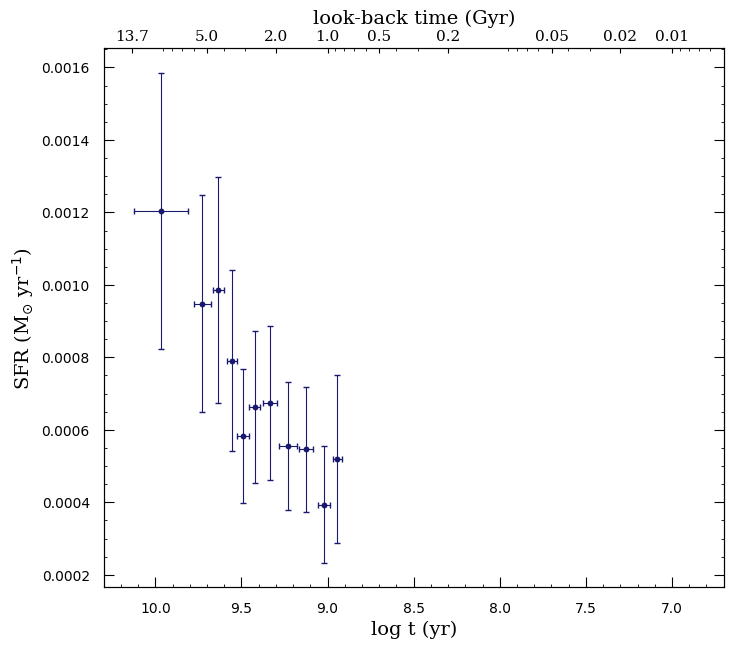

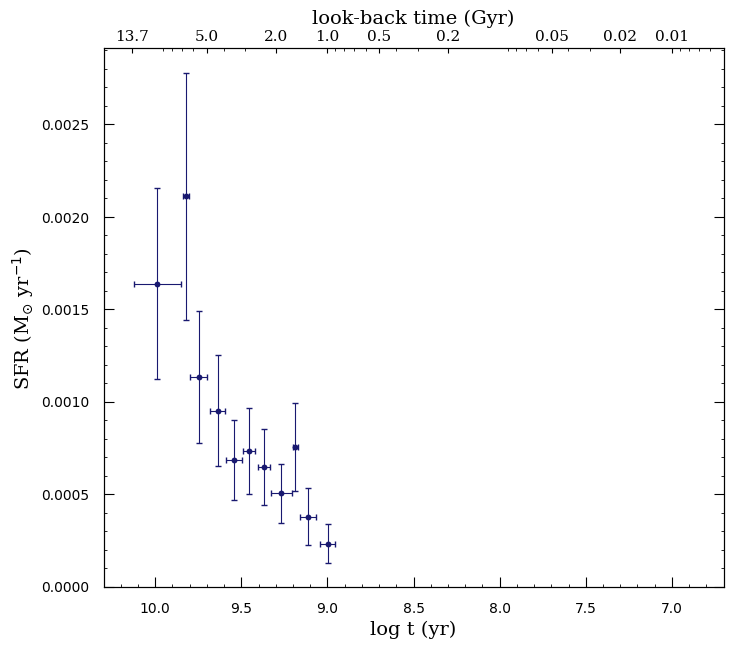

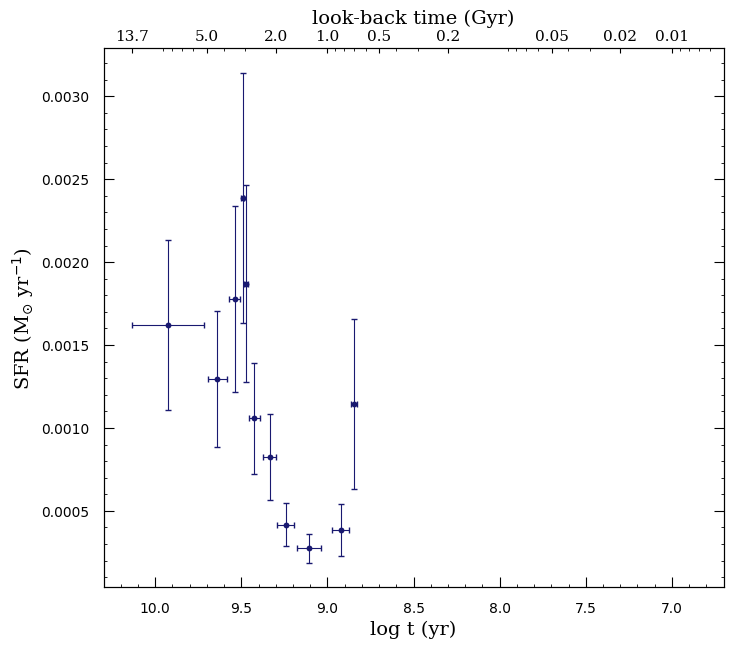

In [38]:
for l in range(len(all_files)):

  #Sorting By t (Age of LPV Stras)
  df = pd.read_csv(all_files[l])
  df = df.merge(df_loc, how='inner', on = ['Ra(J2000) deg','Dec(J2000) deg'])
  df = df[df['Whitelock'] == 0 ]

  #Sorting By t (Age of LPV Stras)
  df = df.sort_values(by='t', ascending=False)
  df = df.reset_index()

  #Finding Alpha
  df['alpha'] = np.nan
  for k in df.index:
    if df.loc[k,'M/Ms'] < 0.08 :
      df.loc[k,'alpha'] = 0.3
    elif df.loc[k,'M/Ms'] >= 0.5 :
      df.loc[k,'alpha'] = 2.3
    else :
      df.loc[k,'alpha'] = 1.3

  # Whole Region
  # Setting populatopn of each bins
  bins_number = 9
  bins_with_more_stars = 0
  bins_pop = ([10]*(bins_number-bins_with_more_stars)) + ([11]*bins_with_more_stars) + [6,5]

  #SFH Calcualtion
  lower_index = 0
  sub_integration = 0

  sub_integration = integrate.quad(lambda m: m * m**-0.3 , 0.02, 0.08)[0] \
                    + integrate.quad(lambda m: m * m**-1.3 , 0.08, 0.5)[0] \
                      + integrate.quad(lambda m: m * m**-2.3 , 0.5, 200)[0]

  log_t = []
  log_t_err = []

  XI = []
  XI_err = []

  alpha =[]
  M_lower_limit = []
  M_upper_limit = []
  log_t_lower_limit = []
  log_t_upper_limit = []

  for i in bins_pop :

    selected_df = df[lower_index:lower_index+i]

    # Calculating limitation of each bin
    M_lower_limit_ = selected_df.iloc[0]['M/Ms']
    M_upper_limit_ = selected_df.iloc[-1]['M/Ms']
    alpha_ = selected_df.iloc[0]['alpha']
    log_t_lower_limit_ = selected_df.iloc[-1]['Log(t)']
    log_t_upper_limit_ = selected_df.iloc[0]['Log(t)']

    # Adding to lists
    alpha.append(alpha_)
    M_lower_limit.append(M_lower_limit_)
    M_upper_limit.append(M_upper_limit_)
    log_t_lower_limit.append(log_t_lower_limit_)
    log_t_upper_limit.append(log_t_upper_limit_)

    # Calculating XI
    p1 = sum(1/selected_df['dt'])
    p2 = sub_integration
    p3 , err = integrate.quad(lambda m: m**(-alpha_) , M_lower_limit_, M_upper_limit_)

    XI_ = p1 * p2 * (1/p3)
    XI_err_ = XI_ * ((i**0.5)/i)

    log_t.append((log_t_lower_limit_ + log_t_upper_limit_)/2)
    log_t_err.append((log_t_upper_limit_ - log_t_lower_limit_ )/2)
    XI.append(XI_)
    XI_err.append(XI_err_)

    lower_index += i

  # Making Data frame for SFH calculation
  columns = ['log(t) (lower limit)' , 'log(t) (upper limit)',
            'M (lower limit)', 'M (upper limit)' , 'Alpha' , 'Mean log(t)',
            'Mean log(t) error' , 'XI' , 'XI error']

  # Calling DataFrame constructor after zipping
  # both lists, with columns specified
  SFH_df = pd.DataFrame(list(zip(log_t_lower_limit, log_t_upper_limit,
                                M_lower_limit,M_upper_limit,alpha,log_t,
                                log_t_err,XI,XI_err)), columns =columns)

  print("MASS:  " + str(sum((pow(10,(SFH_df['log(t) (upper limit)'])) - pow(10,SFH_df['log(t) (lower limit)'])) * SFH_df['XI'])))

  #Plot
  plt.figure(figsize = (8,7), dpi = 100)

  plt.xlabel('log t (yr)', {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})
  plt.ylabel('SFR (M$_{\odot}$ yr$^{-1}$)',
            {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})

  plt.tick_params(axis='both', which='major', length=7, pad=10, direction='in')
  plt.tick_params(axis='y', which='both', left=True, direction='in')
  plt.tick_params(axis='x', which='both', bottom=True, direction='in')
  plt.tick_params(axis='x', which='both', top=True, direction='in')
  plt.tick_params(axis='y', which='both', right=True, direction='in')

  plt.minorticks_on()

  xlim_lower_left, xlim_lower_right = 10.3,6.7
  plt.xlim(xlim_lower_left,xlim_lower_right)

  plt.plot( SFH_df['Mean log(t)'] , SFH_df['XI'] , '.', color = 'midnightblue')
  plt.errorbar(SFH_df['Mean log(t)'], SFH_df['XI'] ,
              SFH_df['XI error'] ,SFH_df['Mean log(t) error'], fmt='.', color='midnightblue', capsize=2.5, linewidth=0.8)


  ###########################################
  ax2 = plt.twiny()

  ax2.xaxis.tick_top()
  ax2.yaxis.tick_right()
  ax2.set_xlim((10**xlim_lower_left)/10**9,(10**xlim_lower_right)/10**9)

  ax2.set_xscale('log')

  ax2.set_xlabel('look-back time (Gyr)', {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})
  ax2.xaxis.set_label_position('top')
  ax2.yaxis.set_label_position('right')
  ax2.set_xticks((13.7,5,2,1,0.5,0.2,0.05,0.02,0.01))
  ax2.get_xaxis().set_major_formatter(ticker.ScalarFormatter(useOffset=None, useMathText=None, useLocale=None))
  ax2.set_yticklabels(ax2.get_yticks(), fontsize=12,fontname = "serif")
  ax2.set_xticklabels(ax2.get_xticks(), fontsize=11,fontname = "serif")

  ax2.tick_params(axis='x',which='both',bottom= False,top= True,direction='in')#,color='red',width=5)
  ax2.yaxis.set_major_formatter(FormatStrFormatter('%0.4f'))
  #ax2.xaxis.set_major_formatter(FormatStrFormatter('%0.2f'))
  ###########################################

  #Saving Data
  SFH_df.to_csv('/content/Outer_Region/NGC6822_SFH_Data_Outer_Region_AMR_Fitting_CEL_'+str(3-l)+'.csv', index=False)
  plt.savefig('/content/Outer_Region/SFR_Outer_Region_AMR_Fitting_CEL_'+str(3-l)+'.jpeg', bbox_inches='tight', dpi = 400)

In [39]:
len(df),sum(bins_pop)

(101, 101)

# Downloading Data

In [ ]:
!zip -r /content/Bar_Whitelock.zip /content/Bar_Whitelock

  adding: content/Bar_Whitelock/ (stored 0%)
  adding: content/Bar_Whitelock/SFR_Bar_Whitelock_AMR_Fitting_CEL_2.jpeg (deflated 57%)
  adding: content/Bar_Whitelock/SFR_Bar_Whitelock_AMR_Fitting_CEL_1.jpeg (deflated 60%)
  adding: content/Bar_Whitelock/NGC6822_SFH_Data_Bar_Whitelock_AMR_Fitting_CEL_1.csv (deflated 51%)
  adding: content/Bar_Whitelock/NGC6822_SFH_Data_Bar_Whitelock_AMR_Fitting_CEL_3.csv (deflated 51%)
  adding: content/Bar_Whitelock/SFR_Bar_Whitelock_AMR_Fitting_CEL_3.jpeg (deflated 57%)
  adding: content/Bar_Whitelock/NGC6822_SFH_Data_Bar_Whitelock_AMR_Fitting_CEL_2.csv (deflated 51%)


In [ ]:
!zip -r /content/Bar.zip /content/Bar

  adding: content/Bar/ (stored 0%)
  adding: content/Bar/NGC6822_SFH_Data_Bar_AMR_Fitting_CEL_3.csv (deflated 52%)
  adding: content/Bar/SFR_Bar_AMR_Fitting_CEL_1.jpeg (deflated 58%)
  adding: content/Bar/NGC6822_SFH_Data_Bar_AMR_Fitting_CEL_2.csv (deflated 52%)
  adding: content/Bar/SFR_Bar_AMR_Fitting_CEL_2.jpeg (deflated 56%)
  adding: content/Bar/SFR_Bar_AMR_Fitting_CEL_3.jpeg (deflated 57%)
  adding: content/Bar/NGC6822_SFH_Data_Bar_AMR_Fitting_CEL_1.csv (deflated 52%)


In [ ]:
!zip -r /content/Outer_Region.zip /content/Outer_Region/

  adding: content/Outer_Region/ (stored 0%)
  adding: content/Outer_Region/NGC6822_SFH_Data_Outer_Region_AMR_Fitting_CEL_3.csv (deflated 51%)
  adding: content/Outer_Region/NGC6822_SFH_Data_Outer_Region_AMR_Fitting_CEL_1.csv (deflated 53%)
  adding: content/Outer_Region/SFR_Outer_Region_AMR_Fitting_CEL_2.jpeg (deflated 60%)
  adding: content/Outer_Region/SFR_Outer_Region_AMR_Fitting_CEL_3.jpeg (deflated 60%)
  adding: content/Outer_Region/NGC6822_SFH_Data_Outer_Region_AMR_Fitting_CEL_2.csv (deflated 52%)
  adding: content/Outer_Region/SFR_Outer_Region_AMR_Fitting_CEL_1.jpeg (deflated 60%)
